# Tema 3: Datasets, Dataloader y funciones Collator

## 1. Datasets

***Dataset***: clase de pytorch diseñada para representar y manejar conjuntos de datos. Es decir, proporciona un acceso estructurado a los datos, sin cargarlos directametne en memoria.


### Dataset precargado


Se tratan de dataset ya disponibles en la librería de Pytorch y no necesitan están guardados en local.

Tipos: Texto, imagen, audio o video (TorchVision)
Permiten realizar transformaciones directamente sobre los datos utilizando.
- Cambiar el tamaño
- Aumento de datos (data augmentation)
- Normalizar
- Etc.


#### Preparar las transformaciones que queremos realizar en nuestros datos

In [ ]:
from torchvision import transforms, datasets
from torchvision.transforms import Lambda
import torch

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((150, 150)),

    # Data augmentation

    transforms.ToTensor(),
    Lambda(lambda x: x / 255.0)

])


transform_val = transforms.Compose([
    transforms.Resize((150, 150)),

    transforms.ToTensor(),
    Lambda(lambda x: x / 255.0)
])

#### Descargar el dataset y aplicar las transformaciones

In [ ]:
train_dataset = datasets.MNIST(root='data', train=True, transform=transform_train, download=True)

# Dataset de validación
val_dataset = datasets.MNIST(root='data', train=False, transform=transform_val, download=True)


In [ ]:
len(train_dataset), len(val_dataset)

(60000, 10000)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_dataset[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 5)

#### Visualizar las primeras 5 muestras del dataset

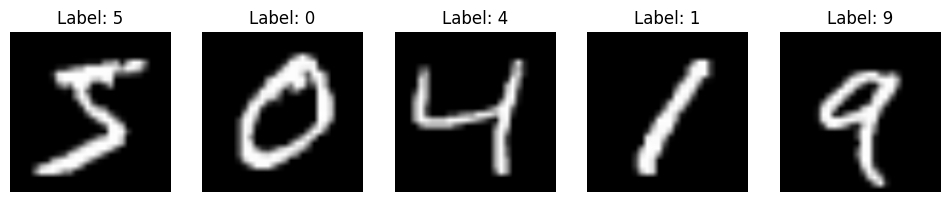

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()


### Cargar dataset propio

Nos permite trabajar con datos que tenemos guardados en local

Necesita crear una Clase de tipo Dataset compuesta de tres funciones:
- __init__: definiremos nuestros datos y en caso de estar en archivo los cargaremos
- __len__: nos proporcionará el número de muestras de
- __getitem__: devolverá muestras del dataset a partir de los índices.


#### Crear dataframe que funcionará como dataset

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)


features_class_0 = np.random.rand(10, 10)
features_class_1 = np.random.rand(10, 10) + 1


labels_class_0 = np.zeros(10, dtype=int)
labels_class_1 = np.ones(10, dtype=int)


features = np.vstack((features_class_0, features_class_1))
labels = np.concatenate((labels_class_0, labels_class_1))


data = pd.DataFrame(features, columns=[f'feature_{i+1}' for i in range(features.shape[1])])
data['label'] = labels

In [ ]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0
3,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0
4,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0
5,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,0
6,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,0
7,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,0
8,0.863103,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,0
9,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,0


#### Creamos la clase TabularDataset

incluyendo todas transformaciones que queremos hacer en los datos

In [ ]:
from torch.utils.data import Dataset
from sklearn.preprocessing import MinMaxScaler

class TabularDataset(Dataset):
    def __init__(self, df):
        # Cargar datos desde el archivo CSV
        self.data = df

        # Separar features y labels
        self.features = self.data.iloc[:, :-1].values  # Todas las columnas excepto la última
        self.labels = self.data.iloc[:, -1].values  # Última columna como etiquetas

        # Normalizar las features entre 0 y 1
        self.scaler = MinMaxScaler()
        features = self.scaler.fit_transform(self.features)
    def __len__(self):
        # Devuelve el número de muestras
        return len(self.features)

    def __getitem__(self, idx):
        # Devuelve una muestra y su etiqueta dado un índice

        features = torch.tensor(features[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return features, label


#### Creamos una instancia de nuestra clase para nuestro dataset concreto

In [ ]:
dataset = TabularDataset(data)

#### Visualizamos la primera muestra del dataset

In [ ]:
print(f"Número de muestras: {len(dataset)}")

# Acceder a la primera muestra
features, label = dataset[0]
print(f"Features normalizadas: {features}")
print(f"Label: {label}")

Número de muestras: 20
Features normalizadas: tensor([0.1823, 0.4615, 0.3775, 0.2950, 0.0000, 0.0000, 0.0000, 0.4345, 0.3012,
        0.3436])
Label: 0


## Dataloaders

***Dataloader***: clase de pytorch que carga eficientemente los datos desde un Dataset, organizandolo en batches, procesarlos, etc.

### Dataset precargado

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=5, shuffle=False)

In [ ]:
for i, batch in enumerate(train_loader):
  print(f"Batch {i+1}")
  print(batch)

  if i == 1:
    break

Batch 1
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([3, 2, 8])]
Batch 2
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
         

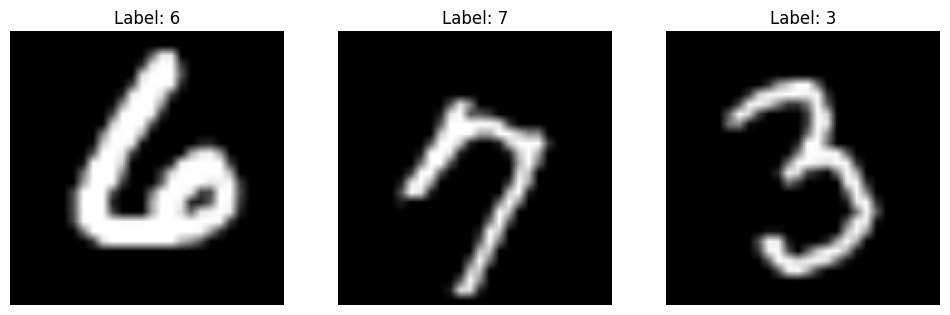

In [ ]:
for i, batch in enumerate(train_loader):
  image, label = batch

  fig, axes = plt.subplots(1, 3, figsize=(12, 6))
  for i in range(3):

      axes[i].imshow(image[i,0,:,:], cmap='gray')
      axes[i].set_title(f"Label: {label[i]}")
      axes[i].axis('off')
  plt.show()

  break

### Dataset propio

In [ ]:
loader = DataLoader(dataset, batch_size=5, shuffle=True)

In [ ]:
for i, batch in enumerate(loader):
  sample, label = batch
  for i in range(2):
    print(f"Label: {label[i]}")
    print(f"Sample: {sample[i]}")

  break

Label: 1
Sample: tensor([1.0000, 0.6328, 0.7753, 0.6822, 0.6170, 0.5135, 0.8816, 0.7836, 0.5368,
        0.6400])
Label: 1
Sample: tensor([0.8533, 0.4990, 0.7830, 0.6412, 0.8139, 0.5936, 0.9278, 0.7200, 1.0000,
        0.5667])


## Funciones Collate

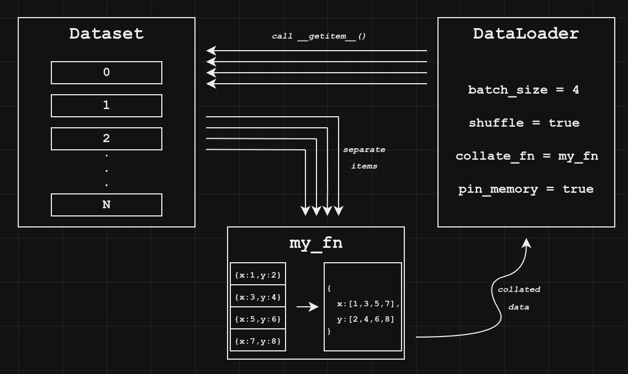

In [ ]:
import torch.nn.functional as F

In [ ]:
def custom_collate_fn(data):
  images_collate = [item[0] for item in data]
  labels_collate = [item[1] for item in data]

  images_collate = torch.stack(images_collate)
  labels_one_hot = F.one_hot(torch.tensor(labels_collate), num_classes=10).float()


  return images_collate, labels_one_hot

In [ ]:
train_loader_collate = DataLoader(train_dataset, batch_size=5, shuffle=True, collate_fn = custom_collate_fn)
val_loader_collate = DataLoader(val_dataset, batch_size=5, shuffle=False, collate_fn = custom_collate_fn)

In [ ]:
for i, batch in enumerate(train_loader_collate):
  print(f"Batch {i+1}")
  print(batch)

  break

Batch 1
(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 

## Técnicas avanzadas: **Optimización de la Carga de Datos utilizando num_workers y prefetch_factor**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import time
import random


class SlowDataset(Dataset):
    def __init__(self, size):
        self.data = range(size)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        time.sleep(0.1)
        return self.data[idx]

In [ ]:
def measure_dataloader_time(dataloader):
    start_time = time.time()
    for batch in dataloader:
        pass
    end_time = time.time()
    return end_time - start_time

In [ ]:
dataset_size = 100
batch_size = 10
dataset = SlowDataset(dataset_size)


configs = [
    {"num_workers": 0, "prefetch_factor": None},
    {"num_workers": 2, "prefetch_factor": 2},
    {"num_workers": 4, "prefetch_factor": 4},
]

In [ ]:
for config in configs:
    print(f"Configuración: {config}")
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=config["num_workers"],
        prefetch_factor=config["prefetch_factor"],
        shuffle=False
    )
    total_time = measure_dataloader_time(dataloader)
    print(f"Tiempo total: {total_time:.2f} segundos\n")

Configuración: {'num_workers': 0, 'prefetch_factor': None}
Tiempo total: 10.03 segundos

Configuración: {'num_workers': 2, 'prefetch_factor': 2}
Tiempo total: 5.14 segundos

Configuración: {'num_workers': 4, 'prefetch_factor': 4}
Tiempo total: 3.21 segundos

